In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# 데이터 API는 데이터셋이 중심, 디스크에서 점진적으로 읽음

# from_tensor_slices() : 텐서 X를 받은 후 item 형식의 데이터 제작 (0~9)
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
# 변환된 메소드 간 연결

dataset = dataset.repeat(5).batch(7)
for item in dataset:
    print(item)

# repeat() 메서드를 통해 원본 데이터를 4번 복사 (메모리에서 직접 복사하는 것은 아님)
# batch() 메서드를 통해 데이터를 7개 씩 그룹화

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9 0 1 2 3 4], shape=(7,), dtype=int32)
tf.Tensor([5 6 7 8 9 0 1], shape=(7,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [5]:
# 패션 mnist 데이터셋
# 각 이미지는 28x28 크기 배열, 픽셀 강도는 정수로 표현

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [0]:
# 검증 세트 할당
# 경사하강법을 이용하기 때문에 입력 피쳐의 스케일 조정
# 0~255기 때문에 255로 나누어 0~1사이로 표준화

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]
X_test = X_test / 255.0

In [0]:
# 분류를 위한 리스트 생성

class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Snraker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train[100]]

'Pullover'

In [9]:
# 시퀀셜 API를 이용하여 모델 구축
"""
model = keras.models.Sequential()                                   # 순서대로 연결된 층, 가장 기본적인 구조
model.add(keras.layers.Flatten(input_shape=[28, 28]))               # 첫 층을 만들고 모델에 추가 / 입력 데이터를 1차원으로 변환하는 간단한 전처리 수행
model.add(keras.layers.Dense(300, activation='relu'))               # 뉴런 300개를 가진 은닉층, 활성화 함수로 relu 사용
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))             # class_nemes의 총 길이와 같은 뉴런을 가진 출력층, 소프트맥스를 통해 입력값과 차이 비교
"""

"\nmodel = keras.models.Sequential()                                   # 순서대로 연결된 층, 가장 기본적인 구조\nmodel.add(keras.layers.Flatten(input_shape=[28, 28]))               # 첫 층을 만들고 모델에 추가 / 입력 데이터를 1차원으로 변환하는 간단한 전처리 수행\nmodel.add(keras.layers.Dense(300, activation='relu'))               # 뉴런 300개를 가진 은닉층, 활성화 함수로 relu 사용\nmodel.add(keras.layers.Dense(100, activation='relu'))\nmodel.add(keras.layers.Dense(10, activation='softmax'))             # class_nemes의 총 길이와 같은 뉴런을 가진 출력층, 소프트맥스를 통해 입력값과 차이 비교\n"

In [0]:
# 다음 구조도 사용 가능

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),               
keras.layers.Dense(300, activation='relu'),               
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [0]:
# 모델의 전체 구조
model.summary()

In [0]:
# 가중치와 편향값
# 가중치는 무작위, 편향은 0으로 초기화

hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

In [0]:
# 모델 생성 후 compile()을 통해 손실 함수와 옵티마이저 지정

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
# 모델 훈련과 평가 / fit() 메서드 이용
# 클래스가 편중되어 있을 시 class_weight 메서드 사용하여 가중치 추가

history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

# 훈련 데이터와 검증 데이터의 사이즈가 맞아야 함
# 정확도 약 89퍼센트 기록

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7154 - accuracy: 0.7659 - val_loss: 0.5047 - val_accuracy: 0.8360
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4901 - accuracy: 0.8295 - val_loss: 0.4559 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8450 - val_loss: 0.4603 - val_accuracy: 0.8370
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4183 - accuracy: 0.8528 - val_loss: 0.3991 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3985 - accuracy: 0.8617 - val_loss: 0.3815 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8661 - val_loss: 0.3699 - val_accuracy: 0.8712
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8700 - val_loss: 0.3776 - val_accuracy:

<function matplotlib.pyplot.show>

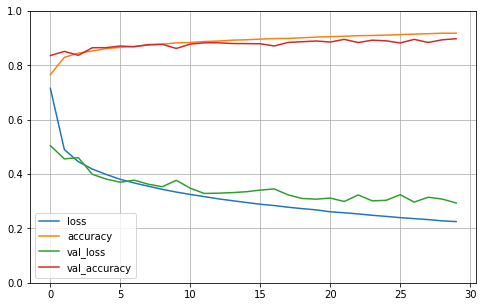

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [17]:
# 모델의 일반화 오차 측정

model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8819


[0.3327038884162903, 0.8819000124931335]

In [18]:
# 예측

X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [21]:
y_new = Y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)